Here we consider different combinations of attributes as the quasi-identifiers:

*   HVER
*   VR
*   R




Franklin

In [3]:
import pandas as pd
from lib.uniques import *

filename_hist1 = 'data/franklin/microdata/franklin_hist.csv'
hist1 = pd.read_csv(filename_hist1)
filename_hist2 = 'data/franklin/microdata/rho_1.60/franklin_hist_dp_blk.csv'
hist2 = pd.read_csv(filename_hist2)

n2, n3, n4 = 2, 2, 63

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE (2016 cells)
hist1_detail = query_detail_ori(hist1)
hist2_detail = query_detail_dp(hist2)

## QID 2: VA * RACE (126 cells)
hist1_va_race = query_race_va_ori(n2, n4, hist1)
hist2_va_race = query_race_va_dp(n2, n4, hist2)

## QID 3: Race* (7 cells)
hist1_race = query_race_ori(n4, hist1)
hist2_race = query_race_dp(n4, hist2)
hist1_detail.shape, hist1_va_race.shape, hist1_race.shape

((22826, 2016), (22826, 126), (22826, 7))

Guernsey

In [4]:
import pandas as pd
from lib.uniques import *

filename_hist1_g = 'data/guernsey/microdata/guernsey_hist.csv'
hist1_g = pd.read_csv(filename_hist1_g)
filename_hist2_g = 'data/guernsey/microdata/rho_1.60/guernsey_hist_dp_blk.csv'
hist2_g = pd.read_csv(filename_hist2_g)

n2, n4 = 2, 63

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
hist1_detail_g = query_detail_ori(hist1_g)
hist2_detail_g = query_detail_dp(hist2_g)

## QID 2: VA * RACE (126 cells)
hist1_va_race_g = query_race_va_ori(n2, n4, hist1_g)
hist2_va_race_g = query_race_va_dp(n2, n4, hist2_g)

## QID 3: Race (7 cells)
hist1_race_g = query_race_ori(n4, hist1_g)
hist2_race_g = query_race_dp(n4, hist2_g)
hist1_detail_g.shape, hist1_va_race_g.shape, hist1_race_g.shape

((3769, 2016), (3769, 126), (3769, 7))

Actual, published, and true uniques

Franklin

In [22]:
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
ppv_detail_blk, ppv_detail_bg, ppv_detail_tr, tpr_detail_blk, tpr_detail_bg, tpr_detail_tr = reid_risk(hist1_detail, hist2_detail)

## QID 2: VA * RACE (126 cells)
ppv_va_race_blk, ppv_va_race_bg, ppv_va_race_tr, tpr_va_race_blk, tpr_va_race_bg, tpr_va_race_tr = reid_risk(hist1_va_race, hist2_va_race) 

## QID 3: Race (7 cells)
ppv_race_blk, ppv_race_bg, ppv_race_tr, tpr_race_blk, tpr_race_bg, tpr_race_tr = reid_risk(hist1_race, hist2_race)

print(ppv_detail_blk, ppv_detail_bg, ppv_detail_tr, tpr_detail_blk, tpr_detail_bg, tpr_detail_tr)
print(ppv_va_race_blk, ppv_va_race_bg, ppv_va_race_tr, tpr_va_race_blk, tpr_va_race_bg, tpr_va_race_tr)
print(ppv_race_blk, ppv_race_bg, ppv_race_tr, tpr_race_blk, tpr_race_bg, tpr_race_tr)

156 16374 3962
119 3661 1010
48 1625 445
161 13061 3239
63 2408 575
31 1038 229
131 6975 2234
16 413 145
6 83 24
0.03937405350832913 0.11782178217821782 0.10786516853932585 0.009527299377061194 0.032504780114722756 0.029538461538461538
0.04970669959864155 0.10956521739130434 0.13537117903930132 0.012326774366434423 0.02616279069767442 0.029865125240847785
0.05863921217547001 0.1103448275862069 0.25 0.01878136200716846 0.0387409200968523 0.07228915662650602


C:\Users\Yue\AppData\Local\Temp\ipykernel_12660\629969703.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = gdf.centroid
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


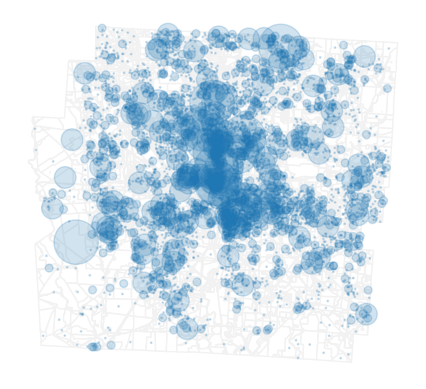

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

filename_nhgis_blk = 'data/nhgis/franklin_nhgis_block.csv'
nhgis_blk = pd.read_csv(filename_nhgis_blk)
nhgis_blk['GEOID10'] = nhgis_blk['GEOID10'].astype(str)
nhgis_blk = nhgis_blk.set_index('GEOID10')

hist1_blk = nhgis_blk[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_blk = hist1_blk.rename(columns={'H72003_sf': 'White', 'H72004_sf': 'Black', 'H72005_sf': 'AIAN', 'H72006_sf': 'Asian', 'H72007_sf': 'NHPI', 'H72008_sf': 'Other race alone', 
                                          'H72009_sf': 'Two or more races'})

au = (hist1_blk == 1)
n_au = np.unique(au.values, return_counts=True)[1][1]
au1 = au.astype(int)
au1['total_actual'] = au.sum(axis=1)

filename_gdf = 'data/geo/tl_2010_39049_tabblock10.shp'
gdf = gpd.read_file(filename_gdf)
centroids = gdf.copy()
centroids.geometry = gdf.centroid
merged = centroids.set_index('GEOID10').join(au1)
merged['total_actual'] = merged['total_actual']**5

fig = gdf.plot(facecolor='w', edgecolor='0.95')
merged.plot(markersize='total_actual', alpha=0.2, ax=fig, legend=True)
# merged.plot(markersize='total_actual', facecolors='none', edgecolor='blue', ax=fig, legend=True)
# merged.plot(column='total_actual', markersize='total_actual', alpha=0.7, legend=True, cmap='Blues', scheme='userdefined', classification_kwds={'bins':[0, 1, 2, 3, 4]}, ax=fig)
fig.set_axis_off()
fig.get_figure().savefig('franklin_au_blk.eps')

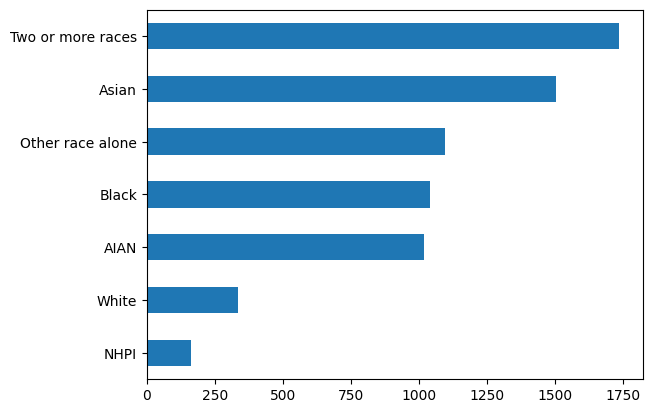

In [3]:
au2 = au.astype(int).sum()
au2.sort_values().plot.barh()
plt.savefig('franklin_au_bar_blk.eps')

Guernsey

In [21]:
from lib.uniques import *

## QID 1: HHGQ ∗ VA ∗ HISP ∗ RACE  (2016 cells)
ppv_detail_blk_g, ppv_detail_bg_g, ppv_detail_tr_g, tpr_detail_blk_g, tpr_detail_bg_g, tpr_detail_tr_g = reid_risk(hist1_detail_g, hist2_detail_g)

## QID 2: VA * RACE (126 cells)
ppv_va_race_blk_g, ppv_va_race_bg_g, ppv_va_race_tr_g, tpr_va_race_blk_g, tpr_va_race_bg_g, tpr_va_race_tr_g = reid_risk(hist1_va_race_g, hist2_va_race_g) 

## QID 3: Race (7 cells)
ppv_race_blk_g, ppv_race_bg_g, ppv_race_tr_g, tpr_race_blk_g, tpr_race_bg_g, tpr_race_tr_g = reid_risk(hist1_race_g, hist2_race_g)

print(ppv_detail_blk_g, ppv_detail_bg_g, ppv_detail_tr_g, tpr_detail_blk_g, tpr_detail_bg_g, tpr_detail_tr_g)
print(ppv_va_race_blk_g, ppv_va_race_bg_g, ppv_va_race_tr_g, tpr_va_race_blk_g, tpr_va_race_bg_g, tpr_va_race_tr_g)
print(ppv_race_blk_g, ppv_race_bg_g, ppv_race_tr_g, tpr_race_blk_g, tpr_race_bg_g, tpr_race_tr_g)

5 855 210
5 144 49
1 62 32
5 766 191
5 107 37
1 42 17
3 402 139
2 32 7
0 4 2
0.023809523809523808 0.10204081632653061 0.03125 0.005847953216374269 0.034722222222222224 0.016129032258064516
0.02617801047120419 0.13513513513513514 0.058823529411764705 0.006527415143603133 0.04672897196261682 0.023809523809523808
0.02158273381294964 0.2857142857142857 0 0.007462686567164179 0.0625 0


C:\Users\Yue\AppData\Local\Temp\ipykernel_12660\550415956.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = gdf.centroid
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


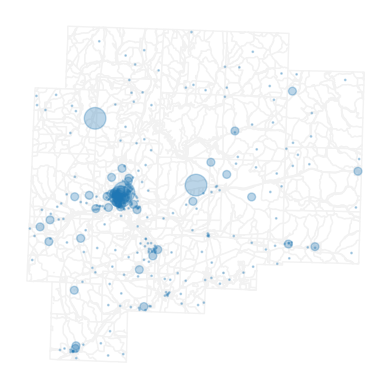

In [24]:
import pandas as pd

filename_nhgis_blk = 'data/nhgis/guernsey_nhgis_block.csv'
nhgis_blk = pd.read_csv(filename_nhgis_blk)
nhgis_blk['GEOID10'] = nhgis_blk['GEOID10'].astype(str)
nhgis_blk = nhgis_blk.set_index('GEOID10')

hist1_blk = nhgis_blk[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_blk = hist1_blk.rename(columns={'H72003_sf': 'White', 'H72004_sf': 'Black', 'H72005_sf': 'AIAN', 'H72006_sf': 'Asian', 'H72007_sf': 'NHPI', 'H72008_sf': 'Other race alone', 
                                          'H72009_sf': 'Two or more races'})

au = (hist1_blk == 1)
n_au = np.unique(au.values, return_counts=True)[1][1]
au1 = au.astype(int)
au1['total_actual'] = au.sum(axis=1)

filename_gdf = 'data/geo/tl_2010_39059_tabblock10.shp'
gdf = gpd.read_file(filename_gdf)
centroids = gdf.copy()
centroids.geometry = gdf.centroid
merged = centroids.set_index('GEOID10').join(au1)
merged['total_actual'] = merged['total_actual']**5

fig = gdf.plot(facecolor='w', edgecolor='0.95')
merged.plot(markersize='total_actual', alpha=0.3, ax=fig, legend=True)
# merged.plot(column='total_actual', markersize='total_actual', alpha=0.7, legend=True, cmap='Blues', scheme='userdefined', classification_kwds={'bins':[0, 1, 32, 243, 1024]}, ax=fig)
fig.set_axis_off()
fig.get_figure().savefig('guernsey_au_blk.eps')

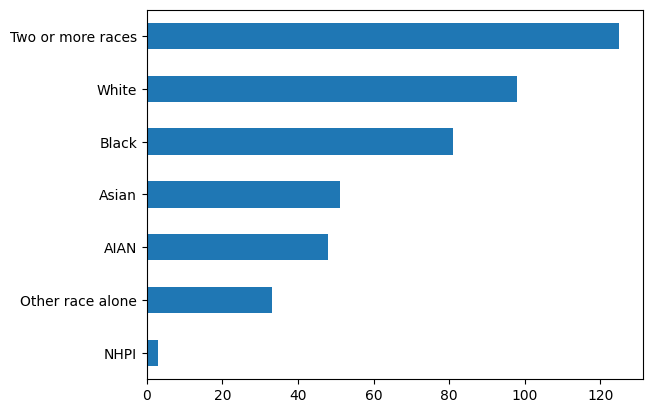

In [13]:
au2 = au.astype(int).sum()
au2.sort_values().plot.barh()
plt.savefig('guernsey_au_bar_blk.eps')

The true uniques

In [9]:
import pandas as pd
filename_nhgis = 'data/nhgis/nhgis_ppdd_20210608_block_OH.csv'
data_nhgis = pd.read_csv(filename_nhgis)

data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['BLOCK'] = data_nhgis["gisjoin"].str.slice(14, 18)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT', 'BLOCK']].apply(lambda x: ''.join(x), axis=1)
data_nhgis_franklin = data_nhgis[data_nhgis["COUNTY"] == '049']
data_nhgis_franklin = data_nhgis_franklin[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis_franklin = data_nhgis_franklin.loc[(data_nhgis_franklin[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis_franklin.to_csv("data/nhgis/franklin_nhgis_block.csv", index=False)

data_nhgis_guernsey = data_nhgis[data_nhgis["COUNTY"] == '059']
data_nhgis_guernsey = data_nhgis_guernsey[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis_guernsey = data_nhgis_guernsey.loc[(data_nhgis_guernsey[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis_guernsey.to_csv("data/nhgis/guernsey_nhgis_block.csv", index=False)

C:\Users\Yue\AppData\Local\Temp\ipykernel_19280\2972241871.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data_nhgis_franklin = data_nhgis_franklin.loc[(data_nhgis_franklin[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
C:\Users\Yue\AppData\Local\Temp\ipykernel_19280\2972241871.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data_nhgis_guernsey = data_nhgis_guernsey.loc[(data_nhgis_guernsey[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]


Franklin

C:\Users\Yue\AppData\Local\Temp\ipykernel_12660\626590883.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = gdf.centroid
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


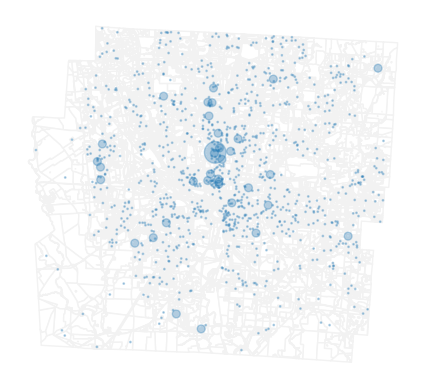

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

filename_nhgis_blk = 'data/nhgis/franklin_nhgis_block.csv'
nhgis_blk = pd.read_csv(filename_nhgis_blk)
nhgis_blk['GEOID10'] = nhgis_blk['GEOID10'].astype(str)
nhgis_blk = nhgis_blk.set_index('GEOID10')

hist1_blk = nhgis_blk[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_blk = hist1_blk.rename(columns={'H72003_sf': 'White', 'H72004_sf': 'Black', 'H72005_sf': 'AIAN', 'H72006_sf': 'Asian', 'H72007_sf': 'NHPI', 'H72008_sf': 'Other race alone', 
                                          'H72009_sf': 'Two or more races'})
hist2_blk = nhgis_blk[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_blk = hist2_blk.rename(columns={'H72003_dp': 'White', 'H72004_dp': 'Black', 'H72005_dp': 'AIAN', 'H72006_dp': 'Asian', 'H72007_dp': 'NHPI', 'H72008_dp': 'Other race alone', 
                                          'H72009_dp': 'Two or more races'})

tu = (hist1_blk == hist2_blk) & (hist1_blk == 1) & (hist2_blk == 1)
n_tu = np.unique(tu.values, return_counts=True)[1][1]
tu1 = tu.astype(int)
tu1['total_true'] = tu.sum(axis=1)

filename_gdf = 'data/geo/tl_2010_39049_tabblock10.shp'
gdf = gpd.read_file(filename_gdf)
centroids = gdf.copy()
centroids.geometry = gdf.centroid
merged = centroids.set_index('GEOID10').join(tu1)
merged['total_true'] = merged['total_true']**5

fig = gdf.plot(facecolor='w', edgecolor='0.95')
merged.plot(markersize='total_true', alpha=0.3, ax=fig, legend=True)
# merged.plot(column='total_true', markersize='total_true', alpha=0.7, legend=True, cmap='Blues', scheme='userdefined', classification_kwds={'bins':[0, 1, 32, 243]}, ax=fig)
fig.set_axis_off()
fig.get_figure().savefig('franklin_tu_blk.eps')

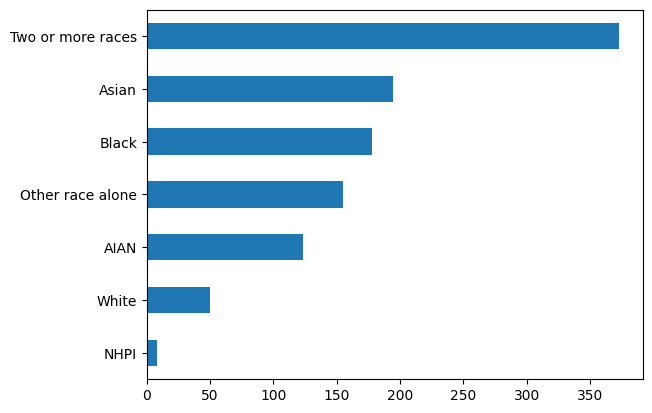

In [15]:
tu2 = tu.astype(int).sum()
tu2.sort_values().plot.barh()
plt.savefig('franklin_tu_bar_blk.eps')

Guernsey

C:\Users\Yue\AppData\Local\Temp\ipykernel_12660\2931738604.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = gdf.centroid
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


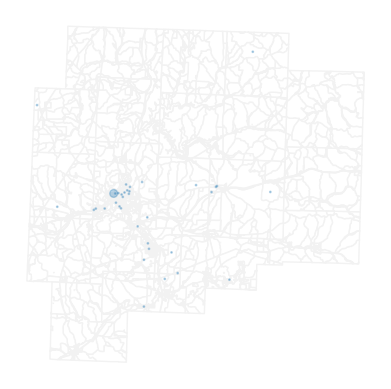

In [27]:
import pandas as pd

filename_nhgis_blk = 'data/nhgis/guernsey_nhgis_block.csv'
nhgis_blk = pd.read_csv(filename_nhgis_blk)
nhgis_blk['GEOID10'] = nhgis_blk['GEOID10'].astype(str)
nhgis_blk = nhgis_blk.set_index('GEOID10')

hist1_blk = nhgis_blk[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_blk = hist1_blk.rename(columns={'H72003_sf': 'White', 'H72004_sf': 'Black', 'H72005_sf': 'AIAN', 'H72006_sf': 'Asian', 'H72007_sf': 'NHPI', 'H72008_sf': 'Other race alone', 
                                          'H72009_sf': 'Two or more races'})
hist2_blk = nhgis_blk[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_blk = hist2_blk.rename(columns={'H72003_dp': 'White', 'H72004_dp': 'Black', 'H72005_dp': 'AIAN', 'H72006_dp': 'Asian', 'H72007_dp': 'NHPI', 'H72008_dp': 'Other race alone', 
                                          'H72009_dp': 'Two or more races'})

tu = (hist1_blk == hist2_blk) & (hist1_blk == 1) & (hist2_blk == 1)
n_tu = np.unique(tu.values, return_counts=True)[1][1]
tu1 = tu.astype(int)
tu1['total_true'] = tu1.sum(axis=1)
hist1_blk['total_true'] = tu1['total_true']

filename_gdf = 'data/geo/tl_2010_39059_tabblock10.shp'
gdf = gpd.read_file(filename_gdf)
centroids = gdf.copy()
centroids.geometry = gdf.centroid
merged = centroids.set_index('GEOID10').join(tu1)
merged['total_true'] = merged['total_true']**5

fig = gdf.plot(facecolor='w', edgecolor='0.95')
merged.plot(markersize='total_true', alpha=0.3, ax=fig, legend=True)
# merged.plot(column='total_true', markersize='total_true', alpha=0.7, legend=True, cmap='Blues', scheme='userdefined', classification_kwds={'bins':[0, 1, 32, 243]}, ax=fig)
fig.set_axis_off()
fig.get_figure().savefig('guernsey_tu_blk.eps')

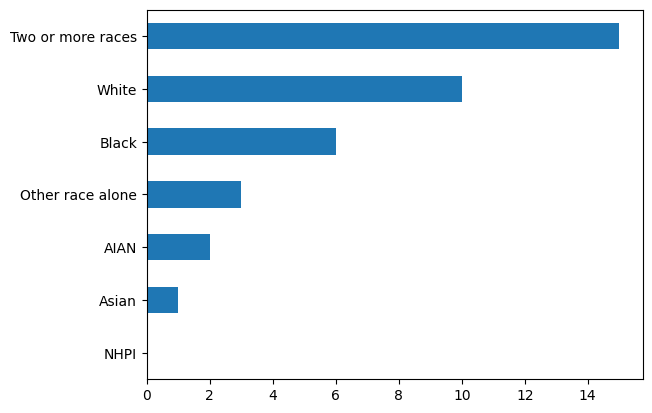

In [93]:
tu2 = tu.astype(int).sum()
tu2.sort_values().plot.barh()
plt.savefig('guernsey_tu_bar_blk.eps')